In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import IPython.display as ipd

from ipywidgets import widgets

In [2]:
from implementations import frames_to_time, amplitude_envelope, rms, zcr, dft, fft, hann_window, stft, amplitude_to_db, mel_filter_banks
from utilities import plot_waveform, plot_fourier_transform, plot_spectrogram, plot_mel_filter_banks

## First load example sound files and display their waveforms

In [3]:
# Use librosa to load in the sound files
snaredrum, sr = librosa.load("example_data/snaredrum_2.wav")
hihat, _ = librosa.load("example_data/hihat_3.wav")
clarinet, _ = librosa.load("example_data/clarinet.wav")

In [4]:
# Set the styling of the widget outputs
css_widget = widgets.HTML("<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: white; text-align: center;}</style>")
ipd.display(css_widget)

# Listen to the soundfiles
elements = []
elements.append(widgets.VBox([widgets.HTML("<h3> Snaredrum </h3>"), widgets.Audio(value=ipd.Audio(data=snaredrum, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Hihat </h3>"), widgets.Audio(value=ipd.Audio(data=hihat, rate=sr).data)]))
elements.append(widgets.VBox([widgets.HTML("<h3> Clarinet </h3>"), widgets.Audio(value=ipd.Audio(data=clarinet, rate=sr).data)]))
ipd.display(widgets.HBox(elements))

HTML(value='<style> .cell-output-ipywidget-background{background-color: transparent !important;} h3{color: whi…

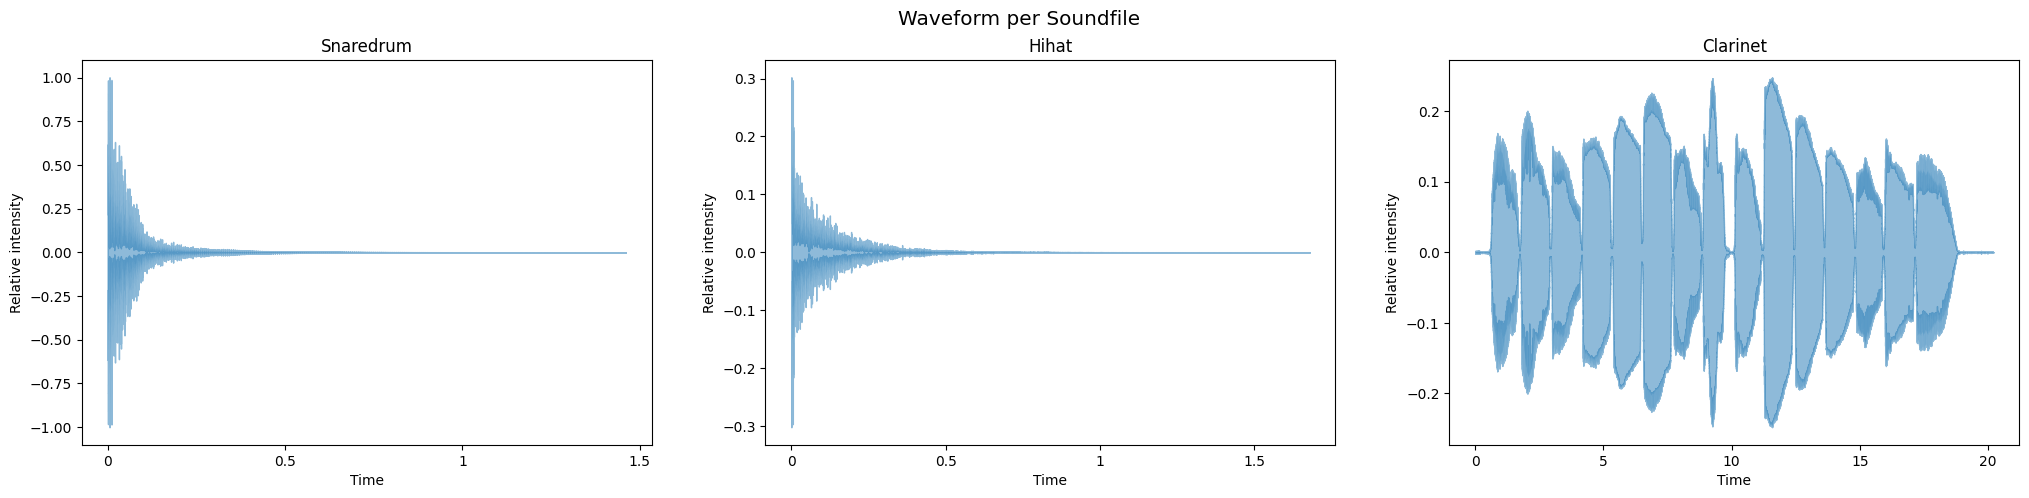

In [5]:
# Plot on different subplots
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")

plt.suptitle("Waveform per Soundfile", fontsize="x-large")
plt.show()

## For each waveform, display the Amplitude Envelope, RMS and Zero-Crossing Rate

In [6]:
# Time domain audio features are calculated over frames
FRAME_SIZE = 2048
HOP_LENGTH = 256

In [7]:
snaredrum_envelope = amplitude_envelope(snaredrum, FRAME_SIZE, HOP_LENGTH)
snaredrum_times = frames_to_time(snaredrum_envelope, HOP_LENGTH)

hihat_envelope = amplitude_envelope(hihat, FRAME_SIZE, HOP_LENGTH)
hihat_times = frames_to_time(hihat_envelope, HOP_LENGTH)

clarinet_envelope = amplitude_envelope(clarinet, FRAME_SIZE, HOP_LENGTH)
clarinet_times = frames_to_time(clarinet_envelope, HOP_LENGTH)

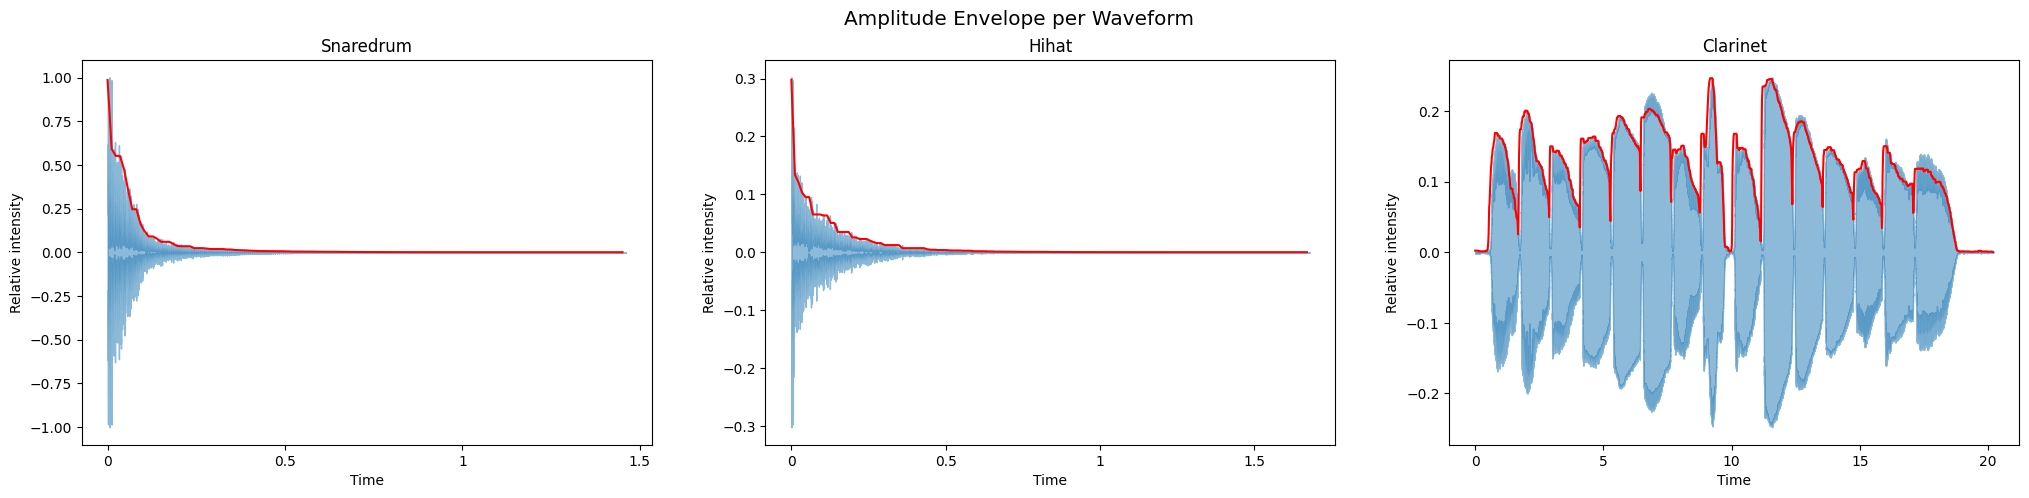

In [8]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")
plt.plot(snaredrum_times, snaredrum_envelope, c="r")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")
plt.plot(hihat_times, hihat_envelope, c="r")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")
plt.plot(clarinet_times, clarinet_envelope, c="r")

plt.suptitle("Amplitude Envelope per Waveform", fontsize="x-large")
plt.show()

In [9]:
snaredrum_rms = rms(snaredrum, FRAME_SIZE, HOP_LENGTH)

hihat_rms = rms(hihat, FRAME_SIZE, HOP_LENGTH)

clarinet_rms = rms(clarinet, FRAME_SIZE, HOP_LENGTH)

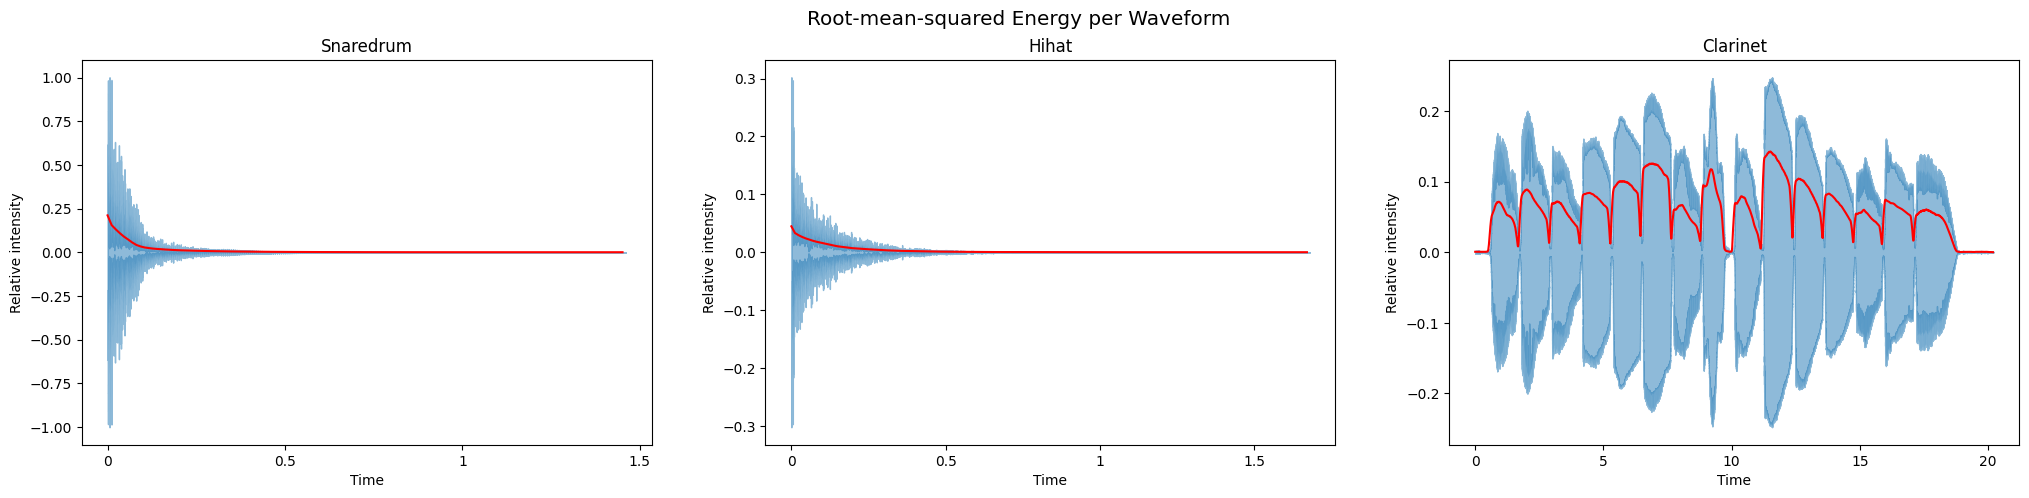

In [10]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_waveform(snaredrum, sr, "Snaredrum")
plt.plot(snaredrum_times, snaredrum_rms, c="r")

plt.subplot(1, 3, 2)
plot_waveform(hihat, sr, "Hihat")
plt.plot(hihat_times, hihat_rms, c="r")

plt.subplot(1, 3, 3)
plot_waveform(clarinet, sr, "Clarinet")
plt.plot(clarinet_times, clarinet_rms, c="r")

plt.suptitle("Root-mean-squared Energy per Waveform", fontsize="x-large")
plt.show()

In [11]:
snaredrum_zcr = zcr(snaredrum, FRAME_SIZE, HOP_LENGTH)

hihat_zcr = zcr(hihat, FRAME_SIZE, HOP_LENGTH)

# Crop to only first 3 seconds of clarinet file
clarinet_zcr = zcr(clarinet[:sr*3], FRAME_SIZE, HOP_LENGTH)
clarinet_times_cropped = frames_to_time(clarinet_zcr, HOP_LENGTH)

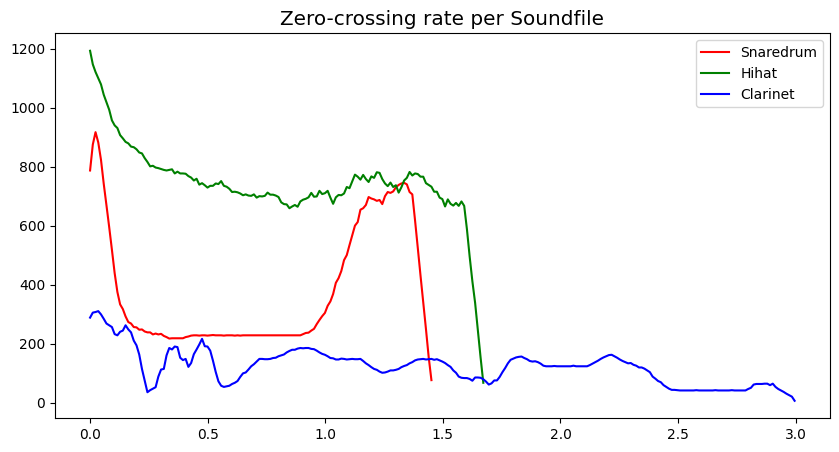

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(snaredrum_times, snaredrum_zcr, c="r", label="Snaredrum")
plt.plot(hihat_times, hihat_zcr, c="g", label="Hihat")
plt.plot(clarinet_times_cropped, clarinet_zcr, c="b", label="Clarinet")

plt.title("Zero-crossing rate per Soundfile", fontsize="x-large")
plt.legend()
plt.show()

## Display the Fourier transform of each waveform

In [13]:
# Computing the exact Fourier transform using the Discrete Fourier transform algorithm is computationally expensive
COMPUTE_DFT = True

snaredrum_dft = dft(snaredrum) if COMPUTE_DFT else np.array([])
snaredrum_fft = fft(snaredrum)
snaredrum_np_fft = np.fft.fft(snaredrum)

hihat_dft = dft(hihat) if COMPUTE_DFT else np.array([])
hihat_fft = fft(hihat)
hihat_np_fft = np.fft.fft(hihat)

clarinet_dft = np.array([]) #dft(clarinet)    # Too computationally expensive to compute
clarinet_fft = fft(clarinet)
clarinet_np_fft = np.fft.fft(clarinet)

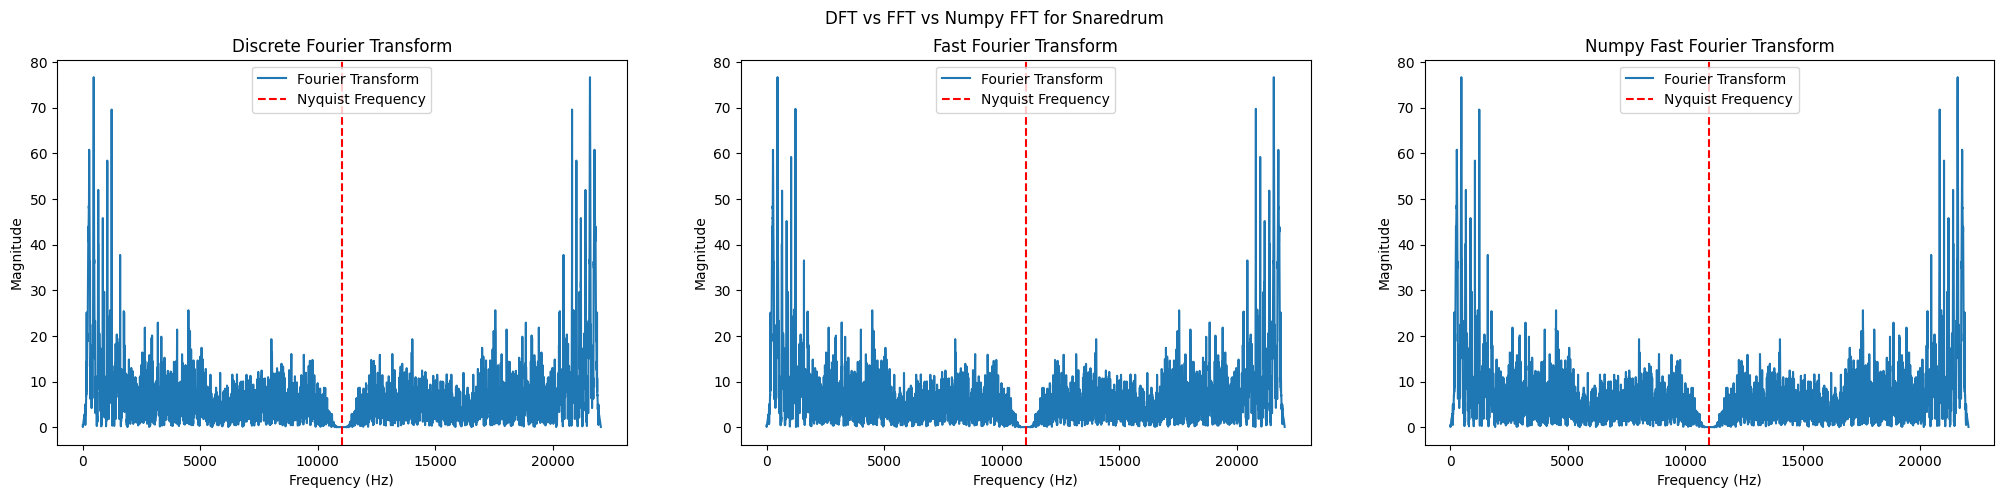

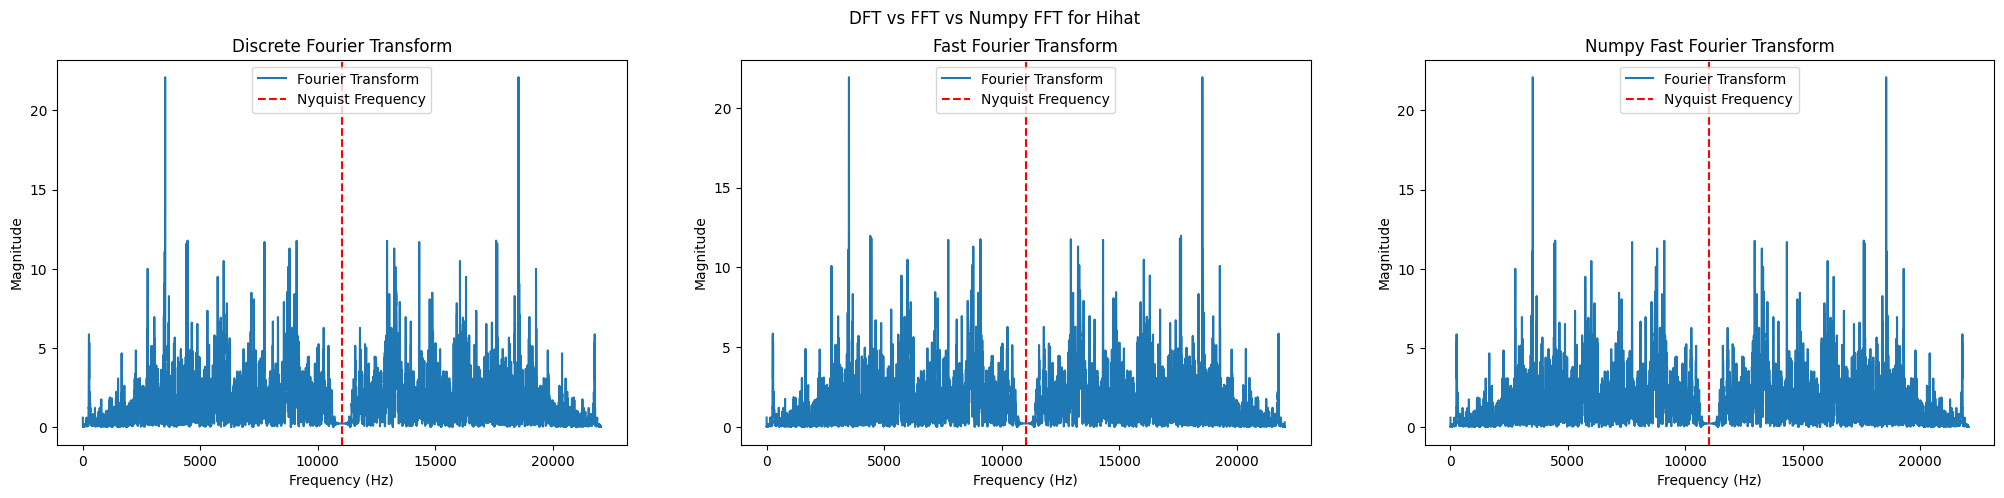

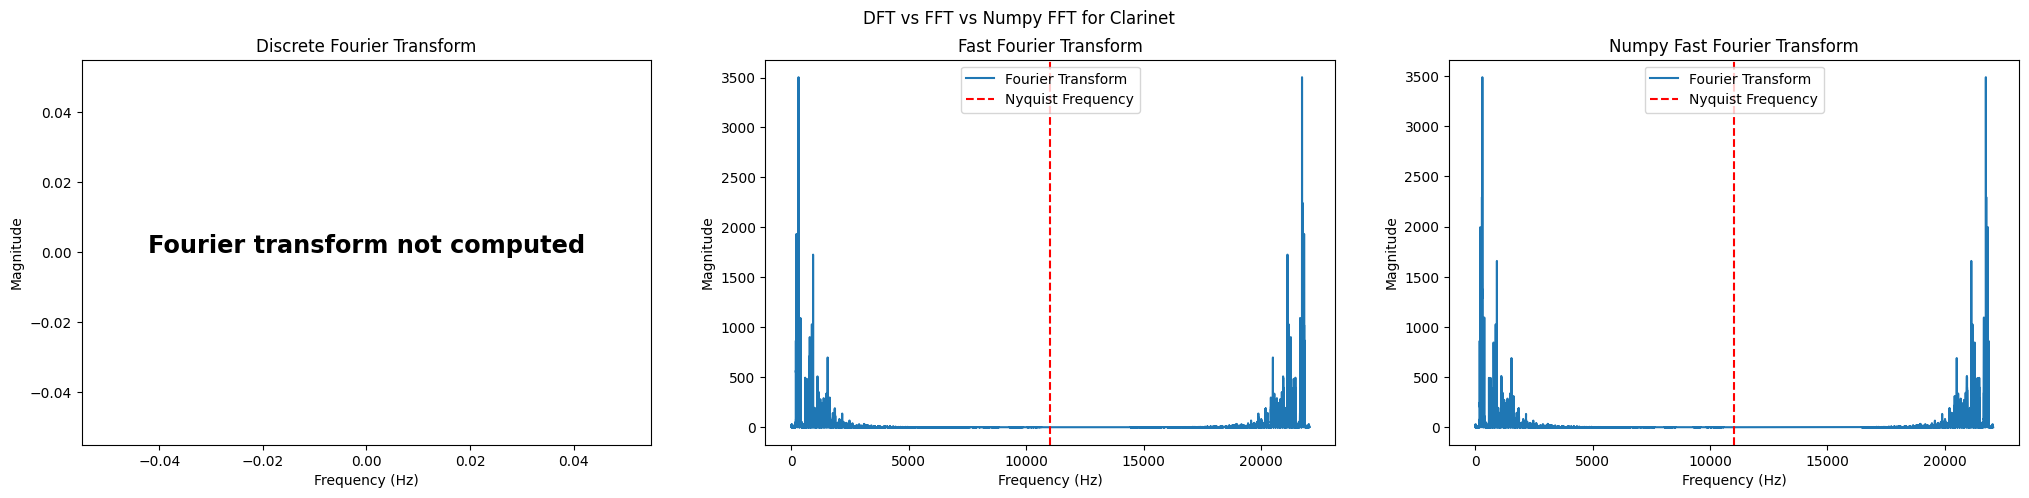

In [14]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(snaredrum_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(snaredrum_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(snaredrum_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Snaredrum")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(hihat_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(hihat_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(hihat_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Hihat")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 3, 1)
plot_fourier_transform(clarinet_dft, sr, "Discrete Fourier Transform", True)

plt.subplot(1, 3, 2)
plot_fourier_transform(clarinet_fft, sr, "Fast Fourier Transform", True)

plt.subplot(1, 3, 3)
plot_fourier_transform(clarinet_np_fft, sr, "Numpy Fast Fourier Transform", True)

plt.suptitle("DFT vs FFT vs Numpy FFT for Clarinet")
plt.show()

## Display the Hann window function, and Short-time Fourier transform for each waveform

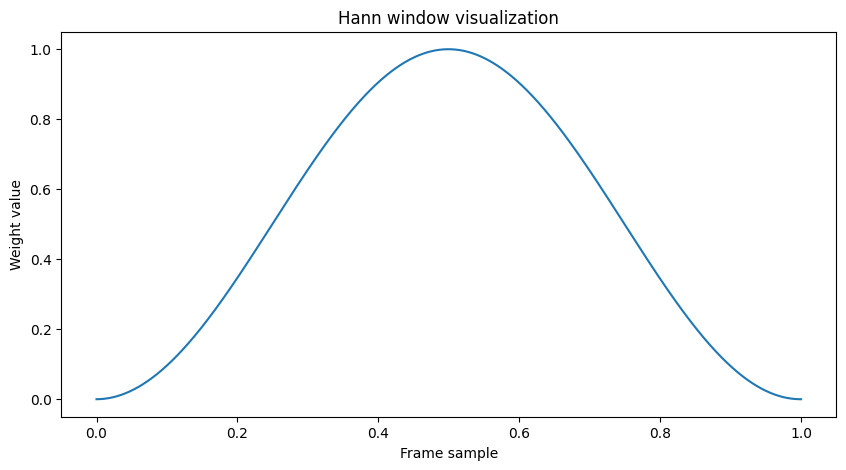

In [15]:
window = hann_window(FRAME_SIZE)

plt.figure(figsize=(10, 5))

plt.plot(np.linspace(0, 1, window.size), window)

plt.xlabel("Frame sample")
plt.ylabel("Weight value")
plt.title("Hann window visualization")

plt.show()

In [16]:
snaredrum_spectrogram = np.abs(stft(snaredrum, FRAME_SIZE, HOP_LENGTH))
snaredrum_librosa_spectrogram = np.abs(librosa.stft(snaredrum, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))

hihat_spectrogram = np.abs(stft(hihat, FRAME_SIZE, HOP_LENGTH))
hihat_librosa_spectrogram = np.abs(librosa.stft(hihat, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))

clarinet_spectrogram = np.abs(stft(clarinet, FRAME_SIZE, HOP_LENGTH))
clarinet_librosa_spectrogram = np.abs(librosa.stft(clarinet, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH))

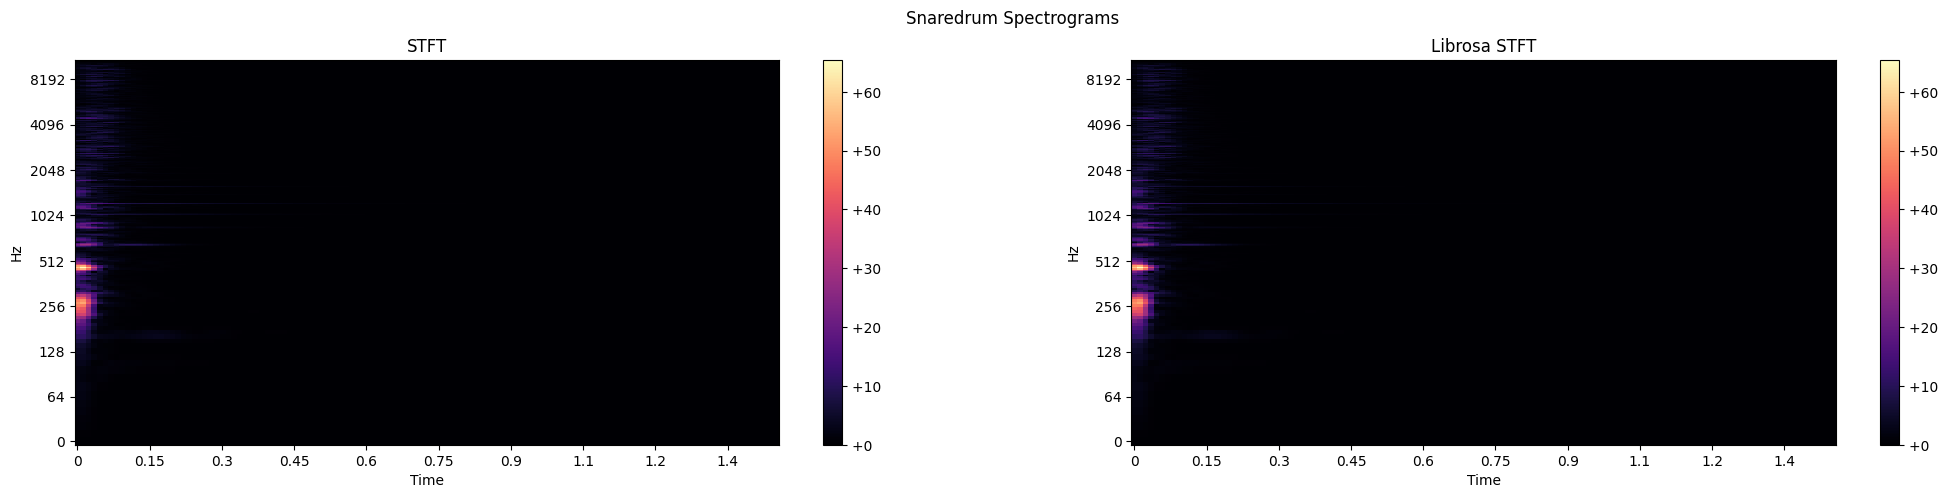

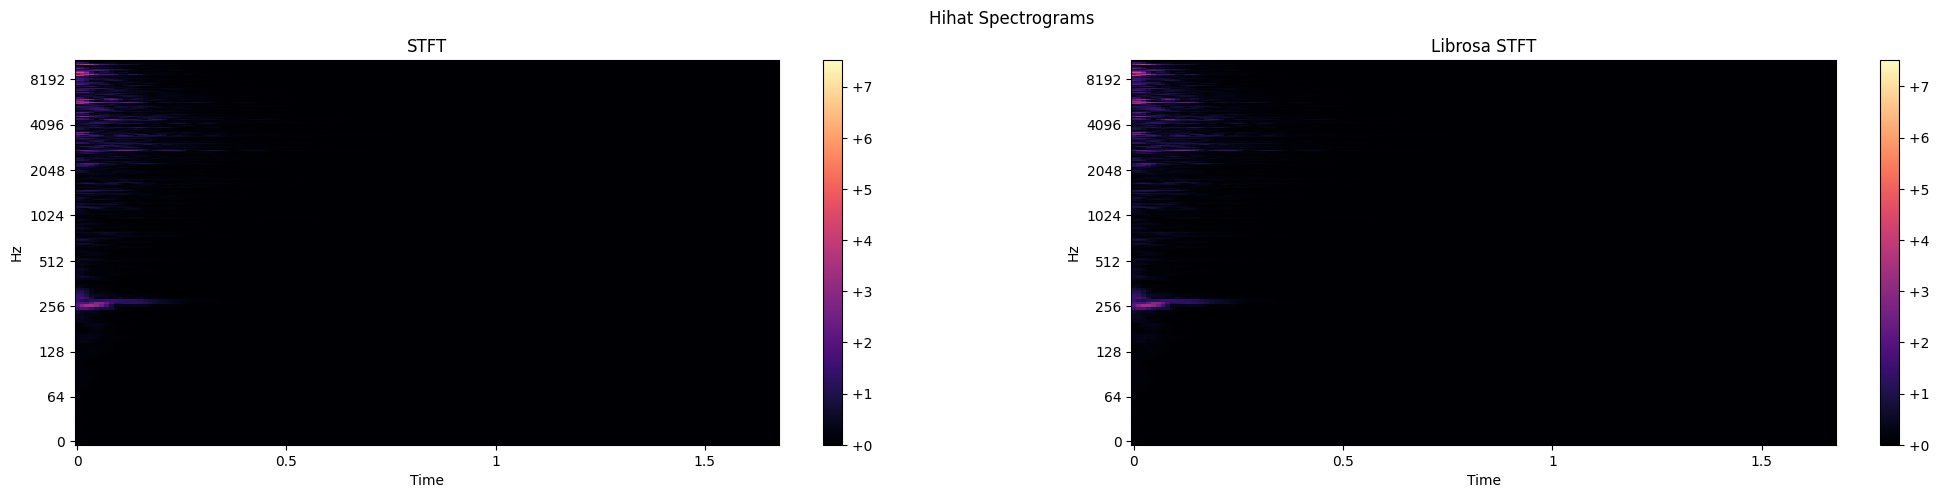

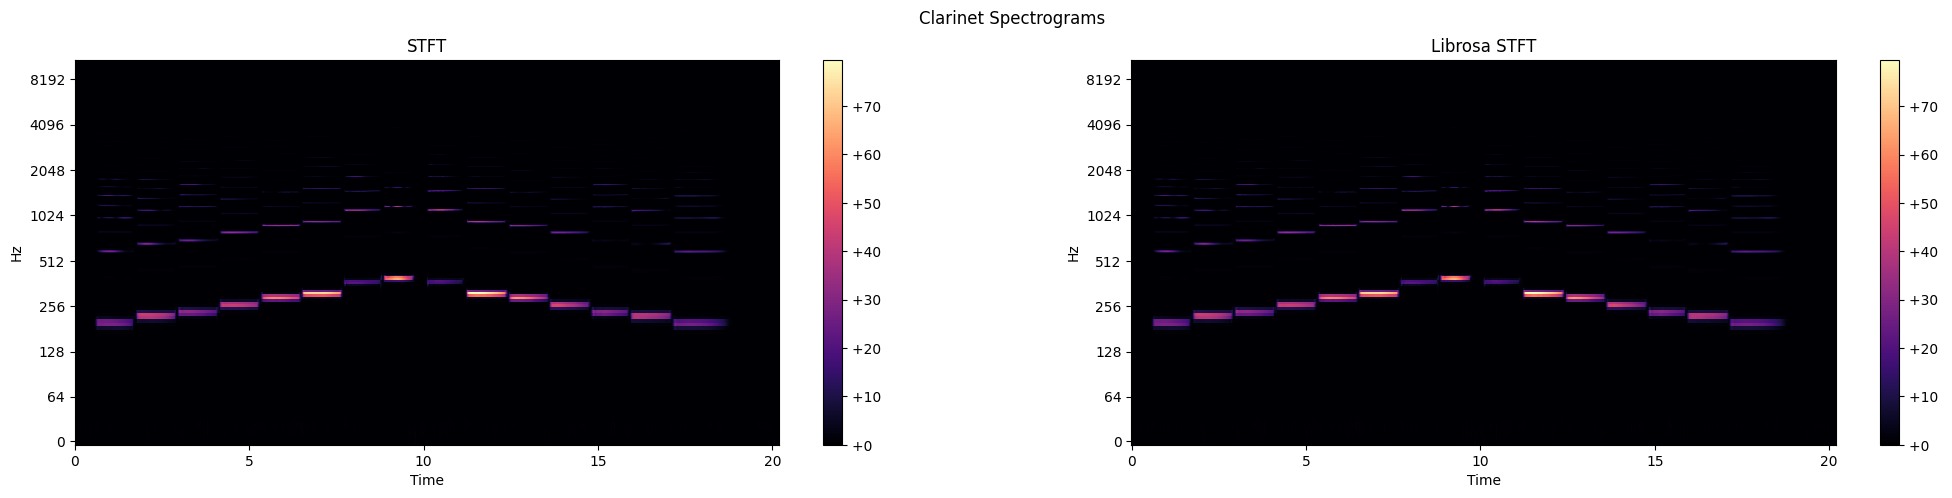

In [17]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(snaredrum_spectrogram, HOP_LENGTH, sr, "STFT", y_axis="log")

plt.subplot(1, 2, 2)
plot_spectrogram(snaredrum_librosa_spectrogram, HOP_LENGTH, sr, "Librosa STFT", y_axis="log")

plt.suptitle("Snaredrum Spectrograms")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(hihat_spectrogram, HOP_LENGTH, sr, "STFT", y_axis="log")

plt.subplot(1, 2, 2)
plot_spectrogram(hihat_librosa_spectrogram, HOP_LENGTH, sr, "Librosa STFT", y_axis="log")

plt.suptitle("Hihat Spectrograms")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(clarinet_spectrogram, HOP_LENGTH, sr, "STFT", y_axis="log")

plt.subplot(1, 2, 2)
plot_spectrogram(clarinet_librosa_spectrogram, HOP_LENGTH, sr, "Librosa STFT", y_axis="log")

plt.suptitle("Clarinet Spectrograms")
plt.show()

## Display the corresponding Log-amplitude spectrograms

In [18]:
snaredrum_spectrogram_db = amplitude_to_db(snaredrum_spectrogram)
snaredrum_librosa_spectrogram_db = librosa.amplitude_to_db(snaredrum_librosa_spectrogram)

hihat_spectrogram_db = amplitude_to_db(hihat_spectrogram)
hihat_librosa_spectrogram_db = librosa.amplitude_to_db(hihat_librosa_spectrogram)

clarinet_spectrogram_db = amplitude_to_db(clarinet_spectrogram)
clarinet_librosa_spectrogram_db = librosa.amplitude_to_db(clarinet_librosa_spectrogram)

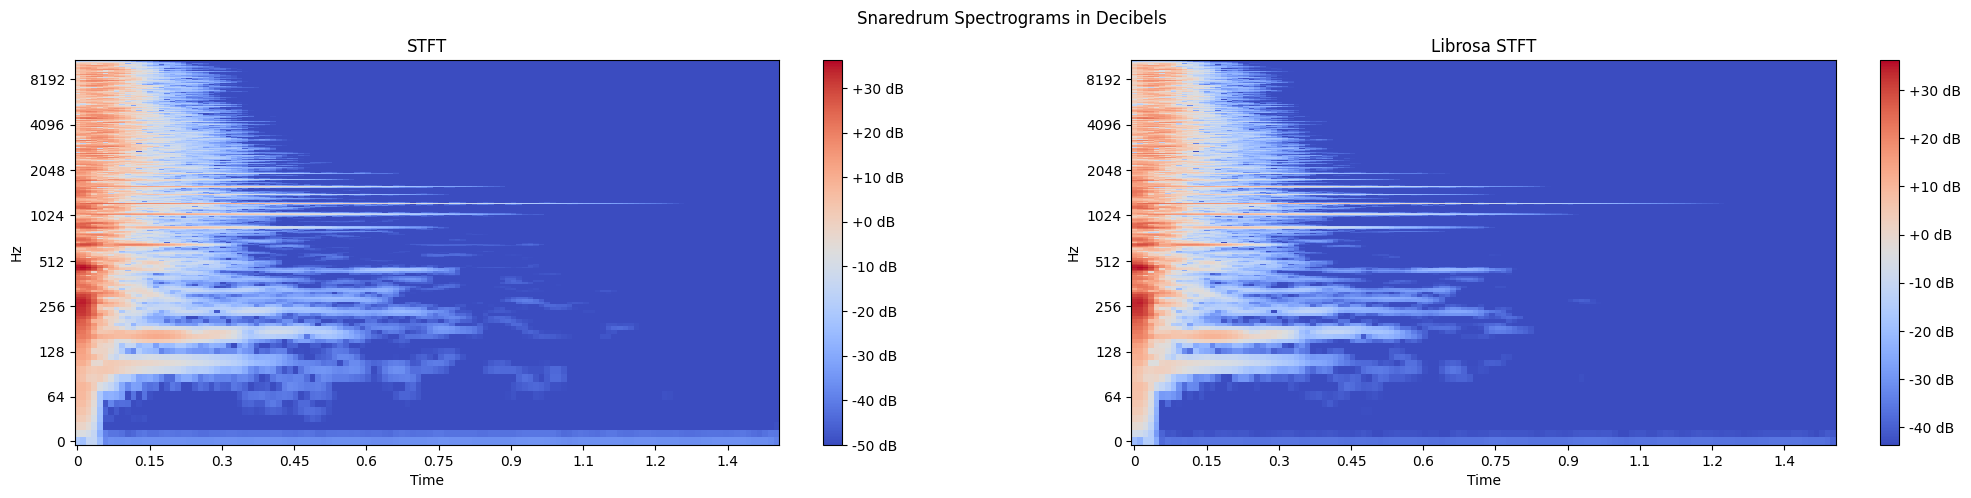

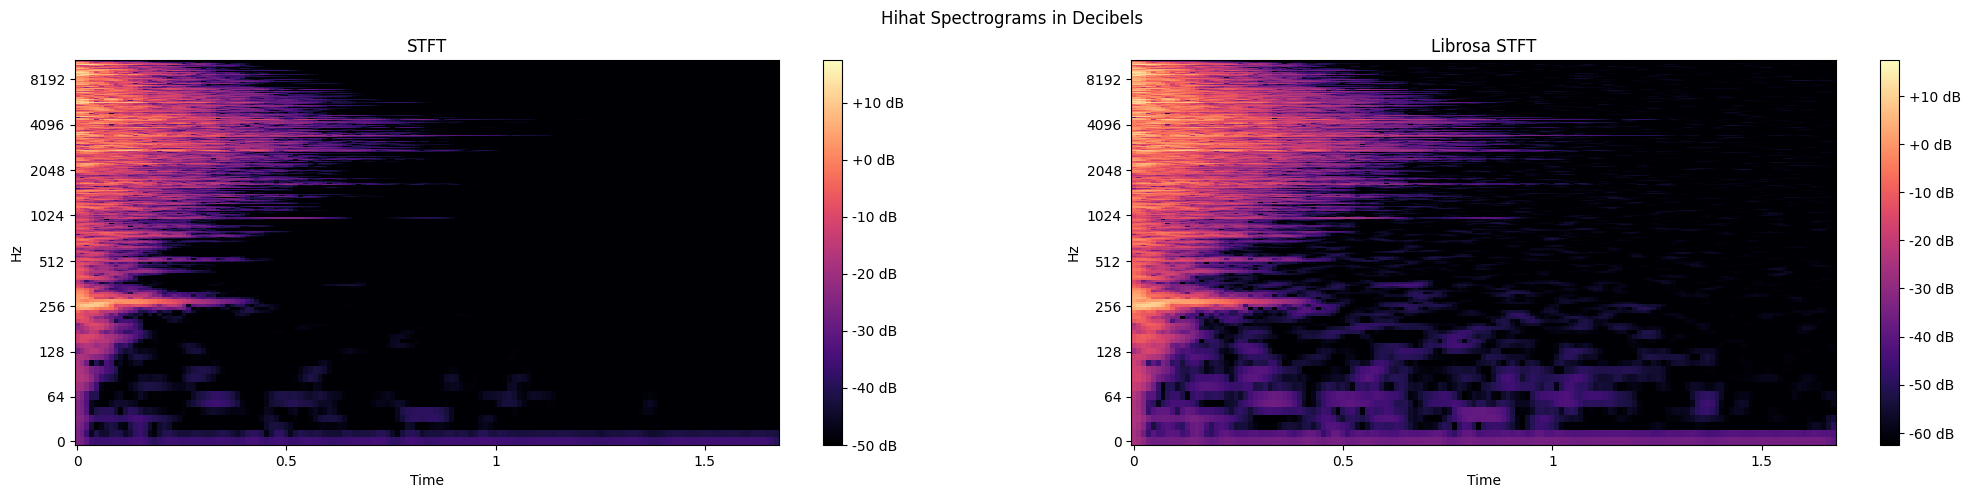

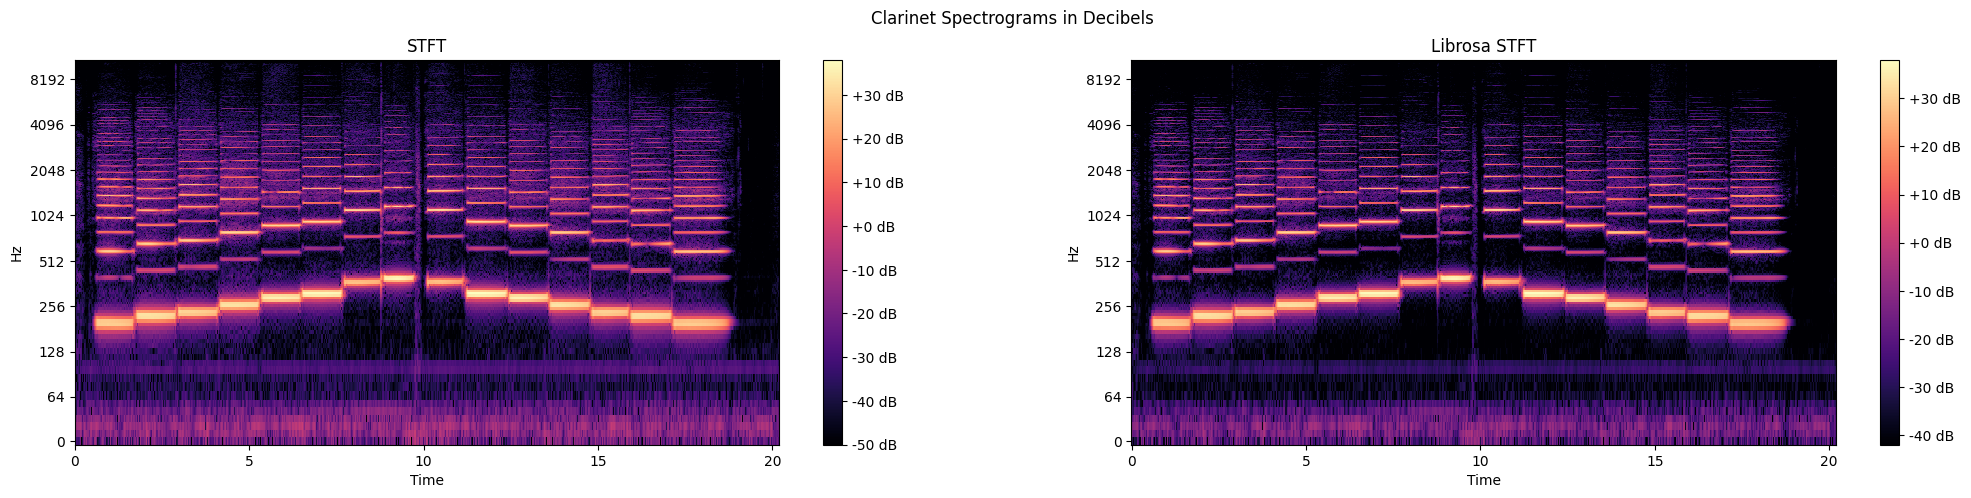

In [19]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(snaredrum_spectrogram_db, HOP_LENGTH, sr, "STFT", y_axis="log", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(snaredrum_librosa_spectrogram_db, HOP_LENGTH, sr, "Librosa STFT", y_axis="log", color_unit="dB")

plt.suptitle("Snaredrum Spectrograms in Decibels")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(hihat_spectrogram_db, HOP_LENGTH, sr, "STFT", y_axis="log", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(hihat_librosa_spectrogram_db, HOP_LENGTH, sr, "Librosa STFT", y_axis="log", color_unit="dB")

plt.suptitle("Hihat Spectrograms in Decibels")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(clarinet_spectrogram_db, HOP_LENGTH, sr, "STFT", y_axis="log", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(clarinet_librosa_spectrogram_db, HOP_LENGTH, sr, "Librosa STFT", y_axis="log", color_unit="dB")

plt.suptitle("Clarinet Spectrograms in Decibels")
plt.show()

## Display the Mel filter banks

In [20]:
filter_banks = mel_filter_banks(sr=sr, n_fft=FRAME_SIZE, n_mels=5)
librosa_filter_banks = librosa.filters.mel(sr=sr, n_fft=FRAME_SIZE, n_mels=5)

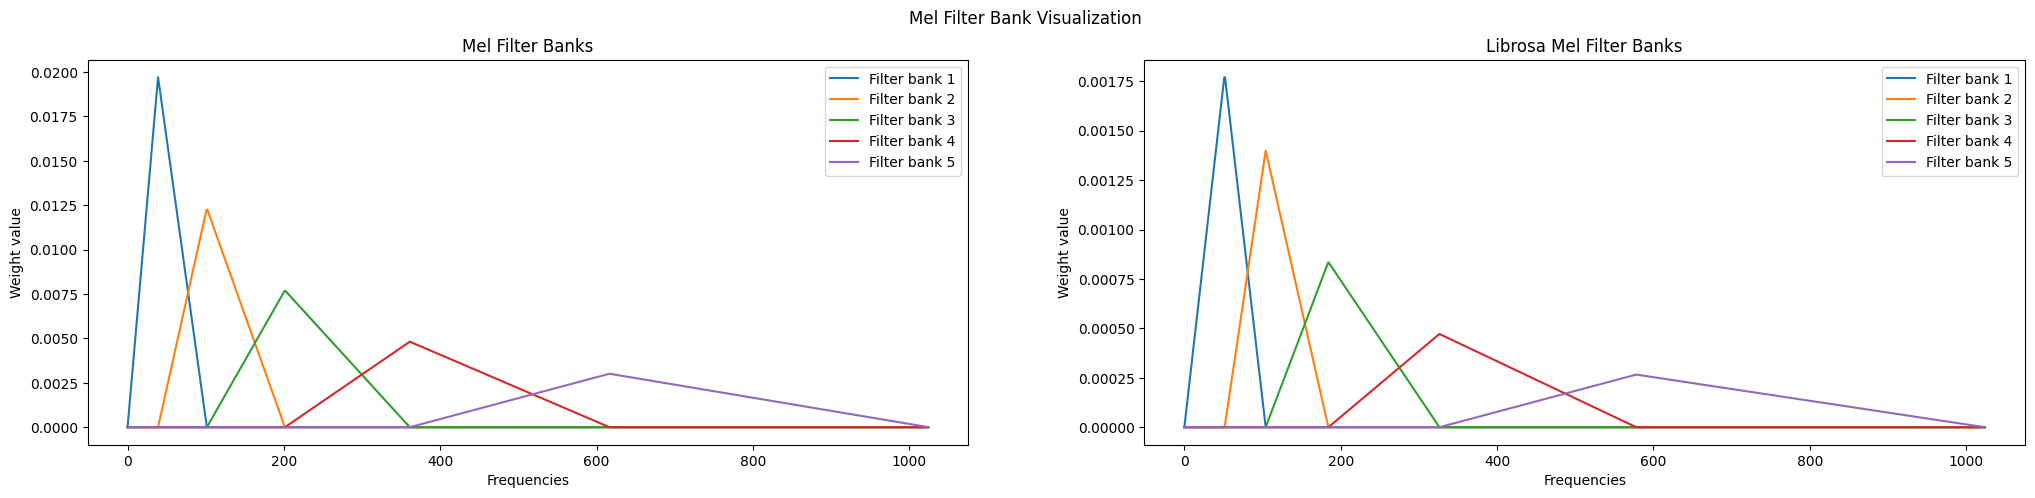

In [21]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_mel_filter_banks(filter_banks, n_fft=FRAME_SIZE, title="Mel Filter Banks")

plt.subplot(1, 2, 2)
plot_mel_filter_banks(librosa_filter_banks, n_fft=FRAME_SIZE, title="Librosa Mel Filter Banks")

plt.suptitle("Mel Filter Bank Visualization")
plt.show()

## Display the Mel-spectrogram for each waveform

In [22]:
N_MELS = 128

snaredrum_filter_banks = mel_filter_banks(sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)
snaredrum_mel_spectrogram_db = snaredrum_filter_banks @ snaredrum_spectrogram_db
snaredrum_librosa_mel_spectrogram_db = librosa.feature.melspectrogram(S=snaredrum_librosa_spectrogram_db, sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)

hihat_filter_banks = mel_filter_banks(sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)
hihat_mel_spectrogram_db = hihat_filter_banks @ hihat_spectrogram_db
hihat_librosa_mel_spectrogram_db = librosa.feature.melspectrogram(S=hihat_librosa_spectrogram_db, sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)

clarinet_filter_banks = mel_filter_banks(sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)
clarinet_mel_spectrogram_db = clarinet_filter_banks @ clarinet_spectrogram_db
clarinet_librosa_mel_spectrogram_db = librosa.feature.melspectrogram(S=clarinet_librosa_spectrogram_db, sr=sr, n_fft=FRAME_SIZE, n_mels=N_MELS)

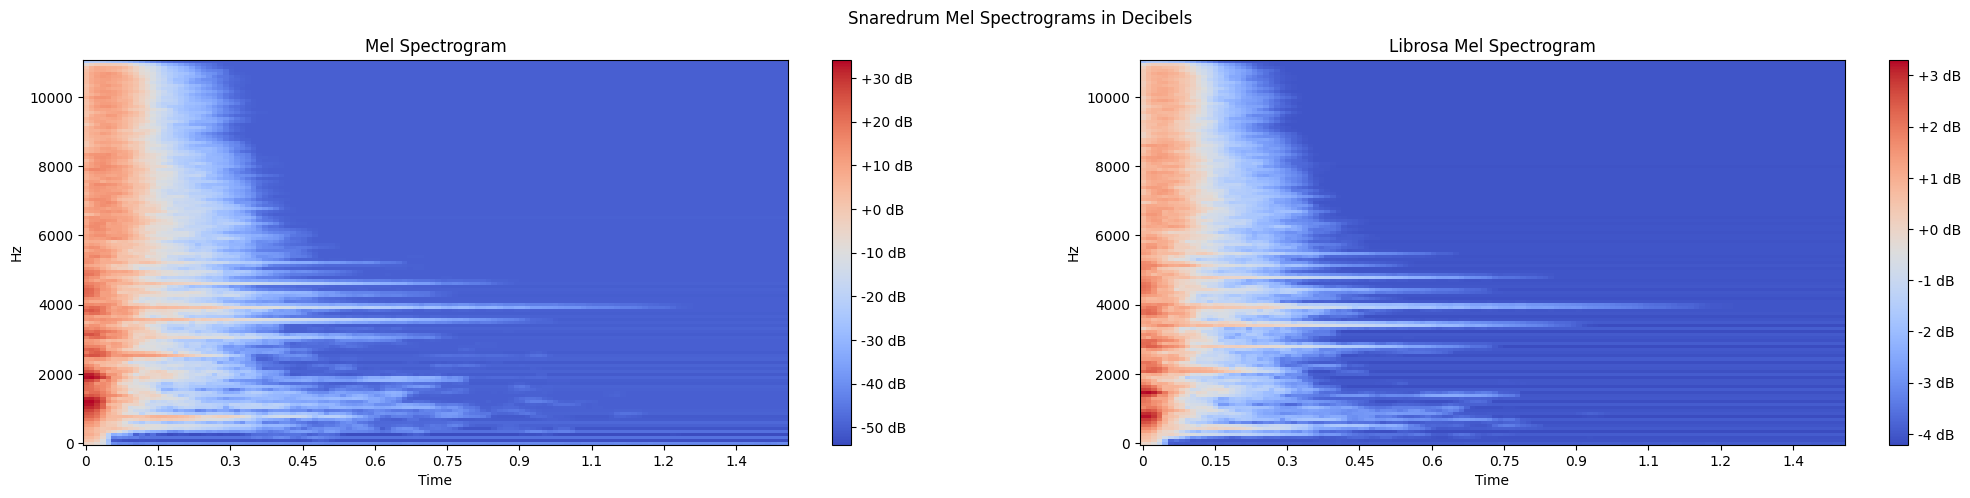

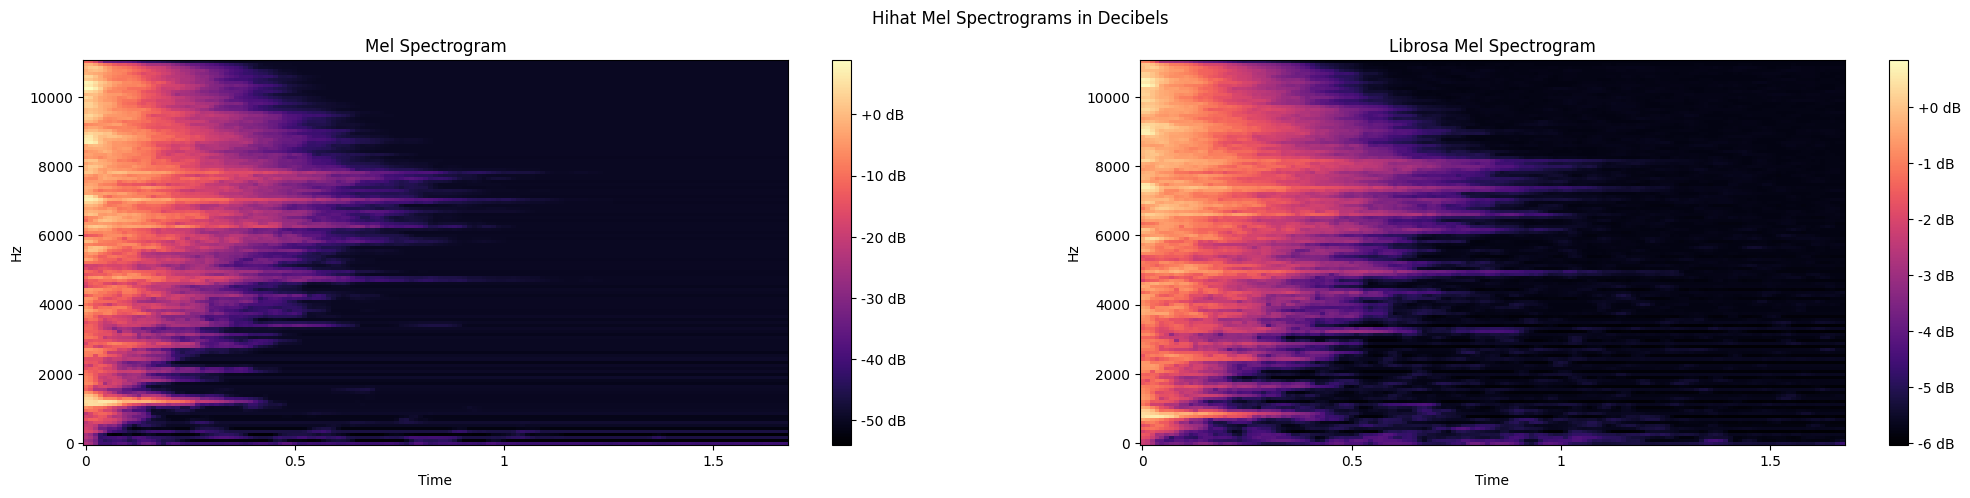

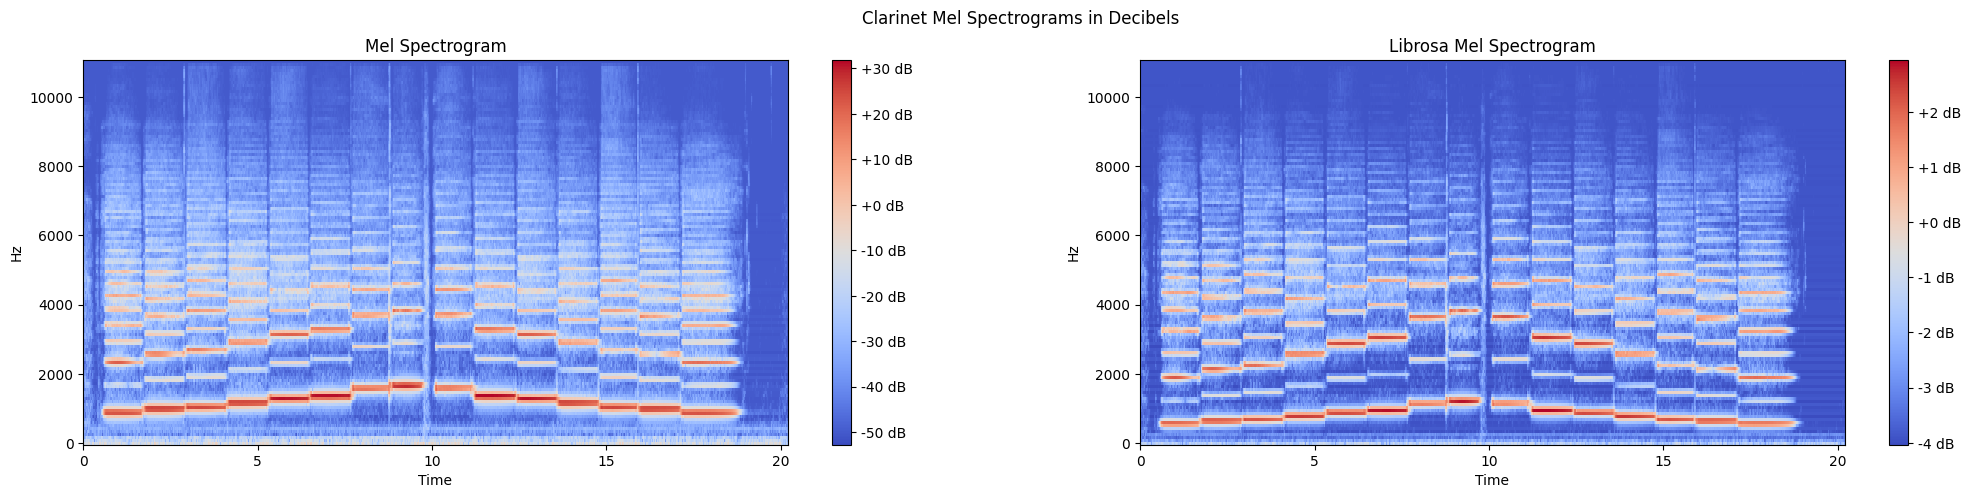

In [23]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(snaredrum_mel_spectrogram_db, HOP_LENGTH, sr, "Mel Spectrogram", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(snaredrum_librosa_mel_spectrogram_db, HOP_LENGTH, sr, "Librosa Mel Spectrogram", color_unit="dB")

plt.suptitle("Snaredrum Mel Spectrograms in Decibels")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(hihat_mel_spectrogram_db, HOP_LENGTH, sr, "Mel Spectrogram", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(hihat_librosa_mel_spectrogram_db, HOP_LENGTH, sr, "Librosa Mel Spectrogram", color_unit="dB")

plt.suptitle("Hihat Mel Spectrograms in Decibels")
plt.show()


plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plot_spectrogram(clarinet_mel_spectrogram_db, HOP_LENGTH, sr, "Mel Spectrogram", color_unit="dB")

plt.subplot(1, 2, 2)
plot_spectrogram(clarinet_librosa_mel_spectrogram_db, HOP_LENGTH, sr, "Librosa Mel Spectrogram", color_unit="dB")

plt.suptitle("Clarinet Mel Spectrograms in Decibels")
plt.show()